# 7. Demonstrate recurrent neural network that learns to perform sequence analysis for stock price.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

# Read training dataset
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Scale the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

# Create X_train and Y_train
X_train = []
Y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshape X_train for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 109ms/step - loss: 0.0383
Epoch 2/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0058
Epoch 7/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0041
Epoch 13/100

In [2]:
# Read test dataset
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Concatenate total dataset
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Create X_test
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict stock prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


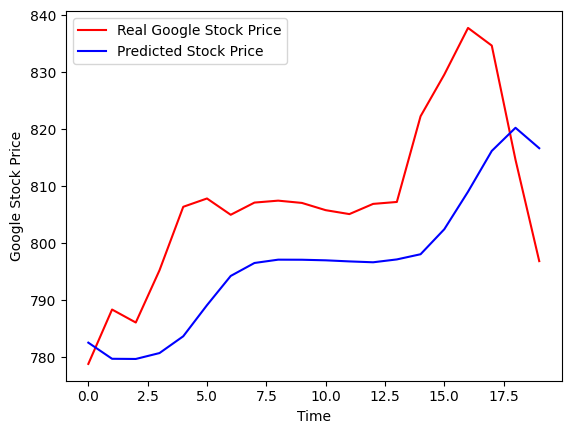

In [3]:
# Visualize results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()